In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [2]:
df = pd.read_csv('abalone.data')

In [3]:
df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df['M'] = df['M'].map({'F':0,'M':1,'I':2})

In [5]:
df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.isnull().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

<Axes: >

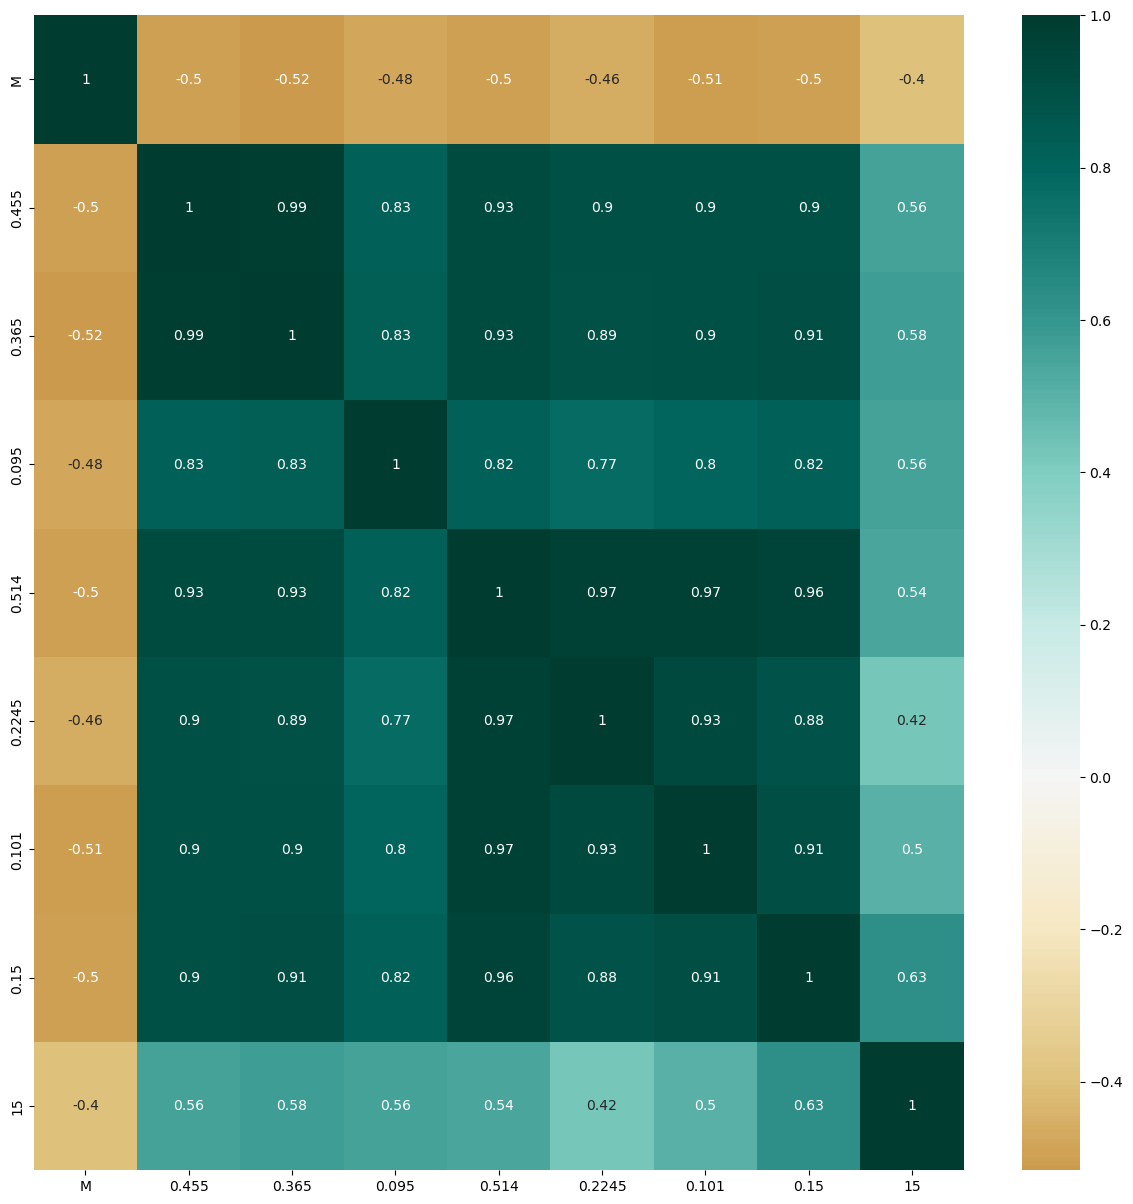

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

In [8]:
# All the features are positively Correlated With the number of Rings it will be difficult to drop any

<Axes: >

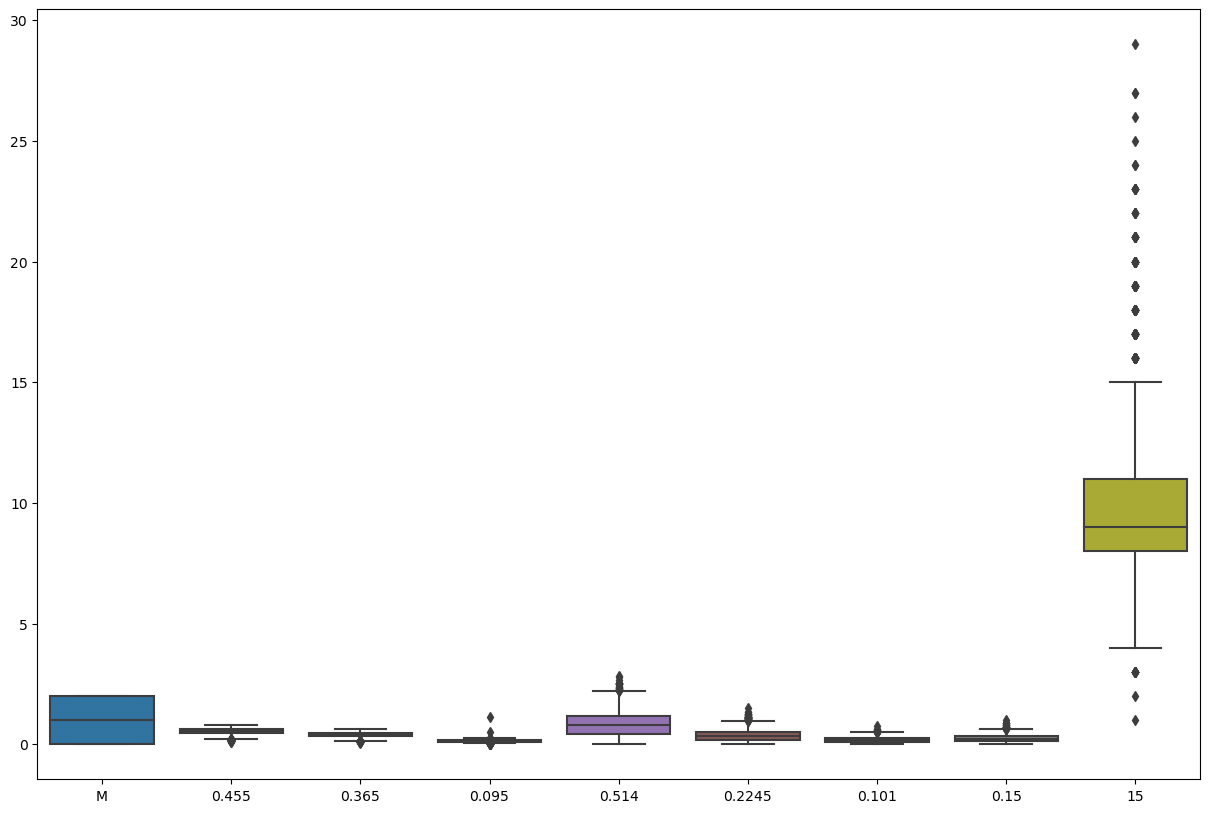

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

# As we can see most of the outliers are from our predictive variable so almost all other features don't have that much outliers

In [10]:
z_score = np.abs((df['15'] - df['15'].mean()) / df['15'].std())
threshold = 3
df = df[(z_score<3)&(z_score>-3)]

In [11]:
df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [12]:
X = df.drop('15',axis = 1)

In [13]:
X

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4172,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4173,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [14]:
Y = df['15']

In [15]:
Y

0        7
1        9
2       10
3        7
4        8
        ..
4171    11
4172    10
4173     9
4174    10
4175    12
Name: 15, Length: 4114, dtype: int64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)

def Master(model, model_name):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acuracy = accuracy_score(y_test, y_pred)
    print(model_name, " : ", acuracy)


In [17]:
classifier = KNeighborsClassifier(n_neighbors = 5)

pipe = [('standard_Scaler',StandardScaler()),('classifier',classifier)]
pipe = Pipeline(pipe)

In [18]:
Master(pipe,'KNN')

KNN  :  0.23207776427703525


In [19]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [20]:
cv =  GridSearchCV(classifier,param_grid,cv = 5)
cv.fit(x_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [21]:
y_pred =cv.predict(x_test)

In [22]:
accuracy_score(y_test,y_pred)

0.24058323207776428

In [23]:
cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}